# Pycaret California housing

- https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

-  https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

## Setup libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
random_state = 786

In [4]:
from pycaret import regression as reg

In [5]:
from pycaret.utils import check_metric

In [6]:
from pycaret.datasets import get_data

In [7]:
import sklearn
from sklearn.datasets import fetch_california_housing

## Get data

In [13]:
california_housing_data = fetch_california_housing(as_frame=True)

In [14]:
print(california_housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [22]:
california_housing = california_housing_data.data

In [31]:
california_housing['target'] = california_housing_data.target

In [32]:
california_housing.dtypes.value_counts()

float64    9
dtype: int64

In [33]:
california_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

Split data into training data and unseen data for predictions

In [36]:
data = california_housing.sample(frac=0.9, random_state=random_state)
data_unseen = california_housing.drop(data.index)

In [37]:
f'training data: {data.shape}, prediction data: {data_unseen.shape}'

'training data: (18576, 9), prediction data: (2064, 9)'

## Setup pycaret

In [38]:
exp_reg1 = reg.setup(data=data, target='target', session_id=1,
                     silent=True, verbose=False)

Display models

In [39]:
reg.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Train models

In [40]:
reg.compare_models(fold=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3220,0.2309,0.4805,0.8267,0.1460,0.1825,0.2450
xgboost,Extreme Gradient Boosting,0.3357,0.2469,0.4969,0.8147,0.1512,0.1891,3.4850
et,Extra Trees Regressor,0.3495,0.2756,0.5250,0.7932,0.1561,0.1974,0.4500
rf,Random Forest Regressor,0.3570,0.2846,0.5334,0.7864,0.1610,0.2054,0.8400
gbr,Gradient Boosting Regressor,0.3731,0.2872,0.5359,0.7844,0.1638,0.2143,0.6550
dt,Decision Tree Regressor,0.5126,0.6091,0.7804,0.5429,0.2323,0.2867,0.0450
omp,Orthogonal Matching Pursuit,0.6244,0.6983,0.8357,0.4760,0.2596,0.3849,0.0100
ada,AdaBoost Regressor,0.7478,0.7536,0.8681,0.4345,0.2910,0.5398,0.3150
en,Elastic Net,0.6780,0.7647,0.8745,0.4261,0.2770,0.4516,0.9100
lasso,Lasso Regression,0.7665,0.9467,0.9730,0.2896,0.3070,0.5177,0.8650


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Create selected models

In [41]:
lightgbm = reg.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3062,0.2194,0.4684,0.8343,0.1409,0.1699
1,0.2961,0.1812,0.4257,0.8692,0.1318,0.1719
2,0.3226,0.2377,0.4876,0.8261,0.1470,0.1773
3,0.3212,0.2293,0.4788,0.8219,0.1420,0.1742
4,0.3129,0.2179,0.4668,0.8316,0.1431,0.1798
5,0.3262,0.2438,0.4938,0.8325,0.1475,0.1812
6,0.3188,0.2203,0.4693,0.8299,0.1399,0.1766
7,0.3045,0.2024,0.4499,0.8525,0.1389,0.1713
8,0.3199,0.2298,0.4794,0.8262,0.1461,0.1880
9,0.3103,0.2168,0.4656,0.8213,0.1442,0.1857


In [45]:
dt = reg.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4842,0.5343,0.7309,0.5966,0.2149,0.2608
1,0.4394,0.4733,0.6880,0.6584,0.2028,0.2366
2,0.4818,0.5406,0.7352,0.6044,0.2184,0.2546
3,0.4763,0.5516,0.7427,0.5715,0.2191,0.2526
4,0.4767,0.5314,0.7290,0.5892,0.2204,0.2676
5,0.4761,0.5438,0.7374,0.6265,0.2201,0.2605
6,0.4573,0.4794,0.6924,0.6299,0.2065,0.2455
7,0.4483,0.5020,0.7085,0.6342,0.2053,0.2459
8,0.4836,0.5731,0.7570,0.5665,0.2265,0.2841
9,0.4677,0.4985,0.7061,0.5891,0.2099,0.2653


## Tune models

In [46]:
tuned_lightgbm = reg.tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3190,0.2360,0.4858,0.8218,0.1462,0.1773
1,0.3050,0.1955,0.4421,0.8589,0.1364,0.1779
2,0.3373,0.2495,0.4995,0.8174,0.1506,0.1869
3,0.3276,0.2414,0.4913,0.8125,0.1470,0.1790
4,0.3296,0.2376,0.4874,0.8164,0.1493,0.1910
5,0.3341,0.2512,0.5012,0.8275,0.1488,0.1849
6,0.3254,0.2310,0.4807,0.8216,0.1428,0.1811
7,0.3125,0.2112,0.4596,0.8461,0.1413,0.1754
8,0.3340,0.2420,0.4920,0.8169,0.1508,0.1974
9,0.3184,0.2263,0.4757,0.8135,0.1476,0.1905


In [48]:
tuned_dt = reg.tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4251,0.4157,0.6448,0.6861,0.1907,0.2278
1,0.3879,0.3347,0.5785,0.7584,0.1756,0.2200
2,0.4316,0.4217,0.6494,0.6914,0.1923,0.2287
3,0.4250,0.4188,0.6471,0.6747,0.1903,0.2268
4,0.4311,0.4114,0.6414,0.6820,0.1940,0.2422
5,0.4121,0.3801,0.6166,0.7389,0.1836,0.2195
6,0.4261,0.4215,0.6492,0.6746,0.1923,0.2345
7,0.4140,0.4028,0.6347,0.7065,0.1886,0.2258
8,0.4240,0.4092,0.6397,0.6905,0.1956,0.2429
9,0.4126,0.3809,0.6171,0.6861,0.1883,0.2335


## Plot models

### Residuals plot

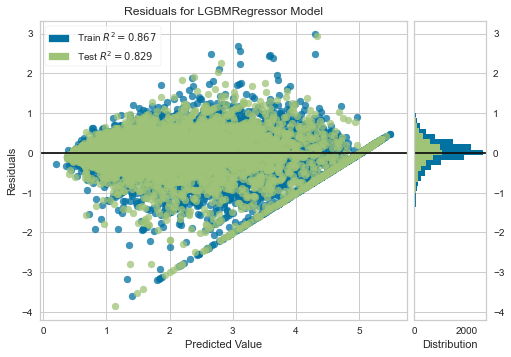

In [49]:
reg.plot_model(tuned_lightgbm, plot='residuals')

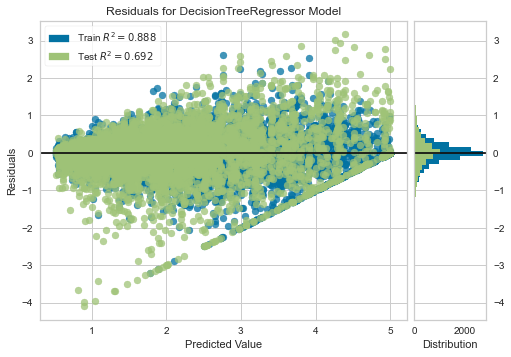

In [50]:
reg.plot_model(tuned_dt, plot='residuals')

### Error plot

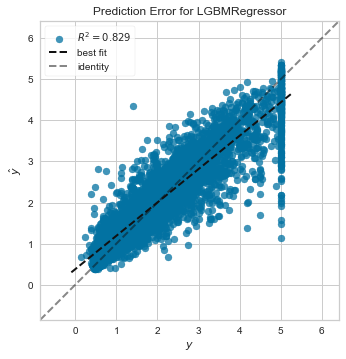

In [51]:
reg.plot_model(tuned_lightgbm, plot='error')

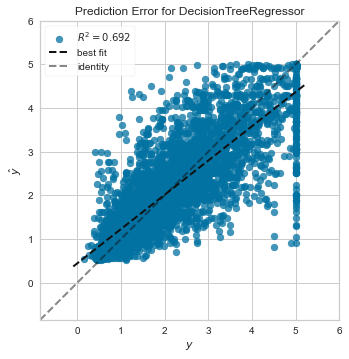

In [52]:
reg.plot_model(tuned_dt, plot='error')

## Predict on hold-out sample

In [53]:
_ = reg.predict_model(tuned_lightgbm, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3145,0.2224,0.4716,0.8290,0.1435,0.1788


## Finalize model

In [54]:
final_lightgbm = reg.finalize_model(tuned_lightgbm)

In [55]:
final_lightgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=100, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=280, n_jobs=-1, num_leaves=70, objective=None,
              random_state=1, reg_alpha=0.1, reg_lambda=0.001, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Predict on unseen data

In [56]:
unseen_predictions = reg.predict_model(final_lightgbm, data=data_unseen, verbose=True)

In [57]:
check_metric(unseen_predictions.target, unseen_predictions.Label, metric='R2')

0.8171

## Save the model

In [58]:
model_file = 'ca_housing-final_lightgbm_2022-01-08.pkl'
reg.save_model(final_lightgbm, model_file)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                colsample_bytree=1.0, feature_fraction=0.6,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=100,
                                min_child_weight=0.001, min_split_gain=0.6,
                

## Use the saved model

In [59]:
saved_final_lightgbm = reg.load_model(model_file)

Transformation Pipeline and Model Successfully Loaded


In [60]:
new_prediction = reg.predict_model(saved_final_lightgbm, data=data_unseen)

In [62]:
check_metric(new_prediction.target, new_prediction.Label, 'R2')

0.8171

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnin

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnin

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnin

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnin

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnin

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1262: FutureWarning: the n_classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/gavin/.local/share/virtualenvs/scikit-vm-8S7AlGJB/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnin

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 